In [1]:
''' 
Result Visualization
Author: Yitian Shao
Created on 2022.01.20
'''
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
''' Load data '''
condiTable = pd.read_csv("./data./ConditionTable.csv") # Table of measurement conditions

measureData = pd.read_csv("./data./Measurements.csv") # Data from physical measurements

measureData.tail()

,Unnamed: 0,CondiName,AvgPressure_kPa,RiseTime_sec,MaxPressure_kPa
110,97,FR3MedTube,6.089633,0.385,9.632123
111,98,FR3MedTube,5.744973,0.639,10.010366
112,99,FR3MedTube,6.232964,0.821,8.363430
113,100,FR3MedTube,9.490346,0.860,14.730733
114,101,FR3MedTube,6.901397,0.756,10.782966


In [3]:
simData = pd.read_csv("./data./temp_result.csv") # Data from model simulation

''' Average and median rising time of each condition '''

simData['deltaT'] = np.nan
simData['deltaTm'] = np.nan

trialsData = []
trialMax = []

for aCondi in condiTable['CondiName']:
    allTrials = measureData[measureData['CondiName'] == aCondi]
    avgDeltaT = np.mean(allTrials['RiseTime_sec'])
    medDeltaT = np.median(allTrials['RiseTime_sec'])
    print("%s - average deltaT = %.3f sec, median deltaT = %.3f sec" % (aCondi, avgDeltaT, medDeltaT))
    
    simData.loc[simData['CondiName'] == aCondi,'deltaT'] = avgDeltaT
#     simData.loc[simData['CondiName'] == aCondi,'deltaTm'] = medDeltaT

    trialsData.append(allTrials['AvgPressure_kPa'])
    trialMax.append(allTrials['AvgPressure_kPa'].max())
    
simData['pLossFull'] = simData['lossFactor']*simData['dVFull_m3']/simData['deltaT']
simData['pLoss1Expan'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaT']

# simData['pLoss1ExpanM'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaTm']



6mLBOPP12 - average deltaT = 0.722 sec, median deltaT = 0.796 sec
6mLBOPP16 - average deltaT = 2.308 sec, median deltaT = 1.876 sec
6mLL0Ws12SoftTube - average deltaT = 1.948 sec, median deltaT = 1.309 sec
BOPP16ShiftedU7kV - average deltaT = 1.470 sec, median deltaT = 0.819 sec
L0Ws16ShiftedU9kV - average deltaT = 1.651 sec, median deltaT = 1.754 sec
L0Ws16NoShift - average deltaT = 2.000 sec, median deltaT = 1.698 sec
Mylar16 - average deltaT = 0.962 sec, median deltaT = 0.960 sec
Mylar16NoShift - average deltaT = 1.363 sec, median deltaT = 0.948 sec
BOPP16 - average deltaT = 1.607 sec, median deltaT = 1.157 sec
BOPP20 - average deltaT = 1.339 sec, median deltaT = 0.957 sec
BOPP16U9kV - average deltaT = 0.850 sec, median deltaT = 0.649 sec
MLSi16SB7kV - average deltaT = 0.115 sec, median deltaT = 0.115 sec
MLSi16CB7kV - average deltaT = 0.124 sec, median deltaT = 0.124 sec
MLSi20SB7kV - average deltaT = 0.130 sec, median deltaT = 0.114 sec
MLSi20B7kV - average deltaT = 0.117 sec, med

In [4]:
print(simData['pLoss1Expan'])

0     4712.817436
1     1485.893761
2     1746.437840
3     2116.702770
4     1885.388753
5     1639.951676
6     3236.015548
7     2405.904161
8     2040.855970
9     2551.870910
10    3857.030548
11    3993.942811
12    3895.333284
13    3771.496441
14    4294.173924
15     844.102549
16    9005.001372
17    8290.898147
18     779.456328
19     940.955506
20     707.690110
21    9455.121348
22     671.276144
Name: pLoss1Expan, dtype: float64


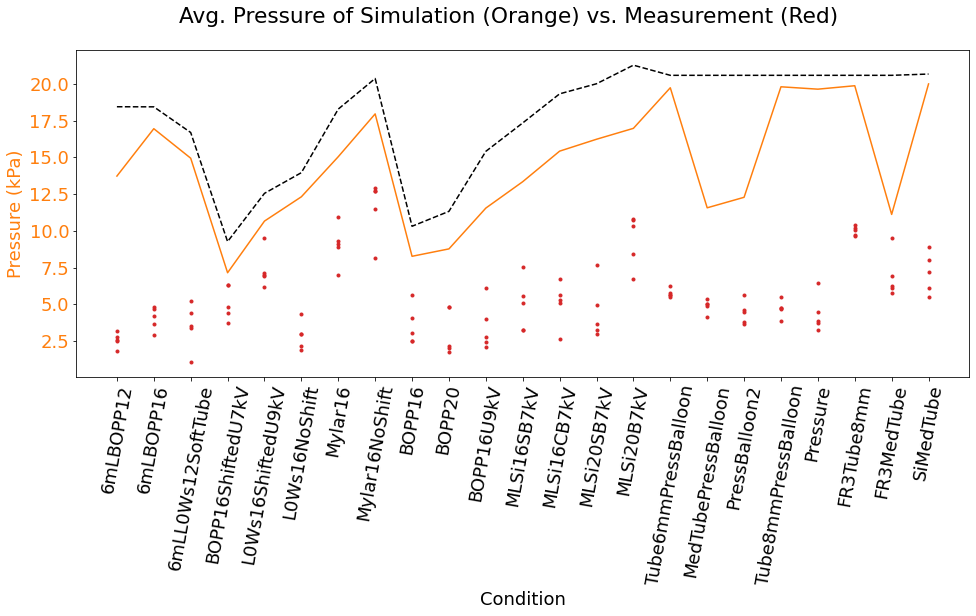

In [5]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], simData['P1Expan_Pa']*1e-3, '--', color='k')
ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
# ax1.plot(simData['CondiName'], (simData['PFull_Pa'] - simData['pLossFull'])*1e-3, '--', color='b')
#ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1ExpanM'])*1e-3, color='b')
ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax1.set_ylim([0, 22.5]);

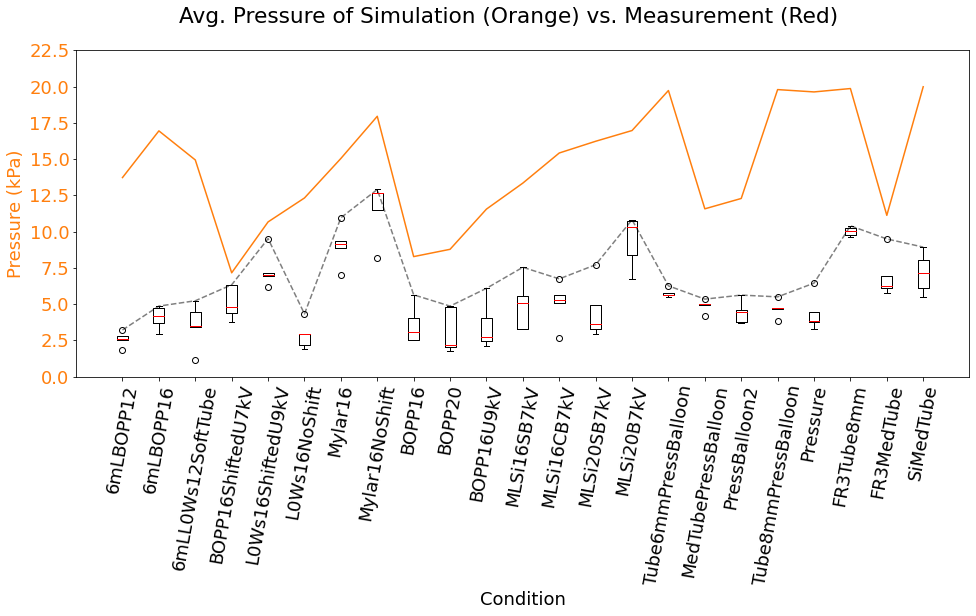

In [6]:
''' Boxplot of trials '''
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

x = range(len(simData))

ax1.plot(x, trialMax, '--', color='tab:grey')

ax1.plot(x, (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
box1 = ax1.boxplot(trialsData, positions=x, widths = 0.3, manage_ticks = False, medianprops=dict(color='red'))

ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

plt.xticks(x, simData['CondiName'])

ax1.set_ylim([0, 22.5]);

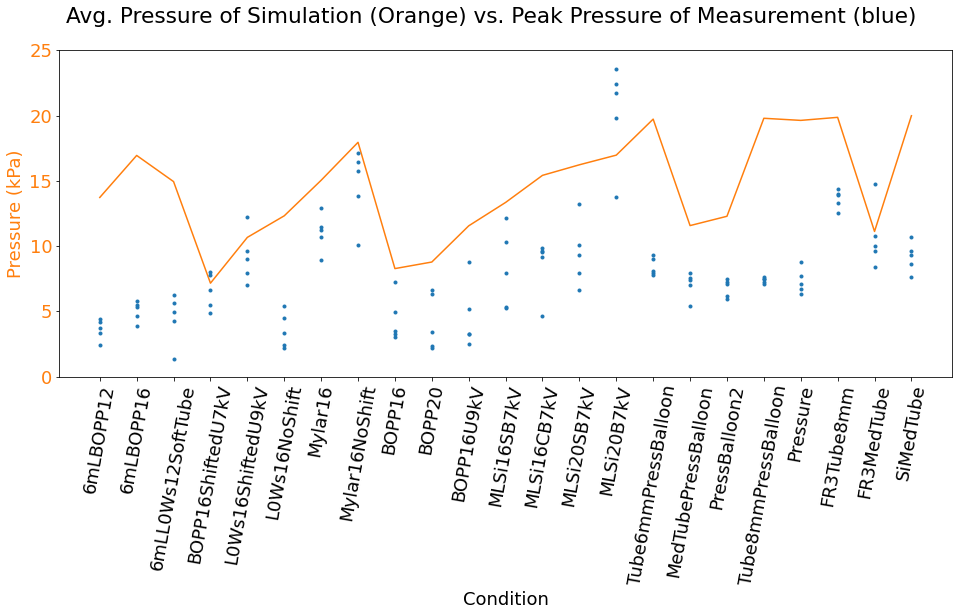

In [7]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Peak Pressure of Measurement (blue)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax1.set_ylim([0, 25]);

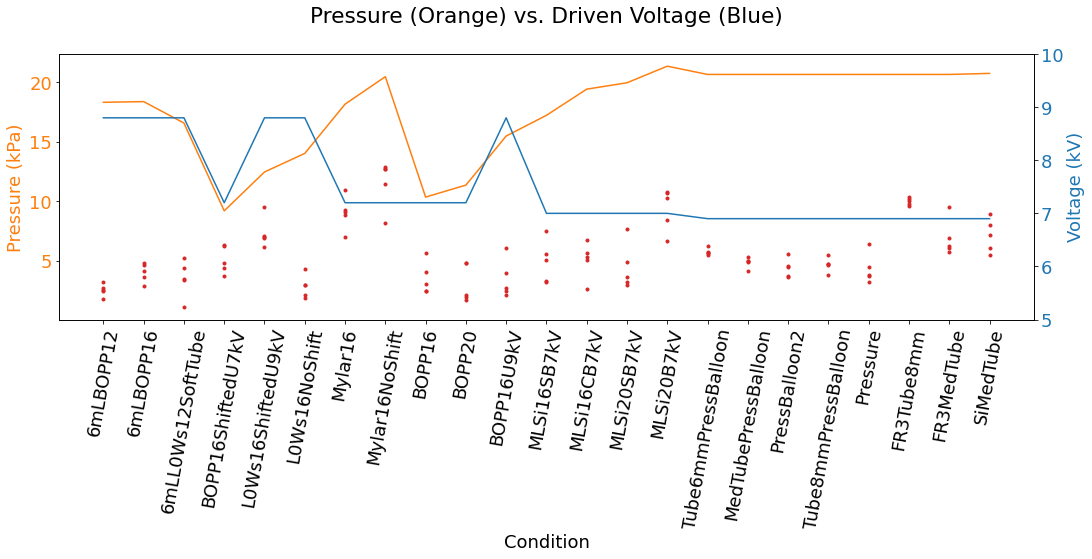

In [8]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,8)
fig1.suptitle("Pressure (Orange) vs. Driven Voltage (Blue)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], simData['PFull_Pa']*1e-3, color='tab:orange')
ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx() 
ax2.plot(condiTable['CondiName'], condiTable['Voltage_V']*1e-3, '-', color='tab:blue')
ax2.set_ylabel('Voltage (kV)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout() 

ax2.set_ylim([5, 10]);


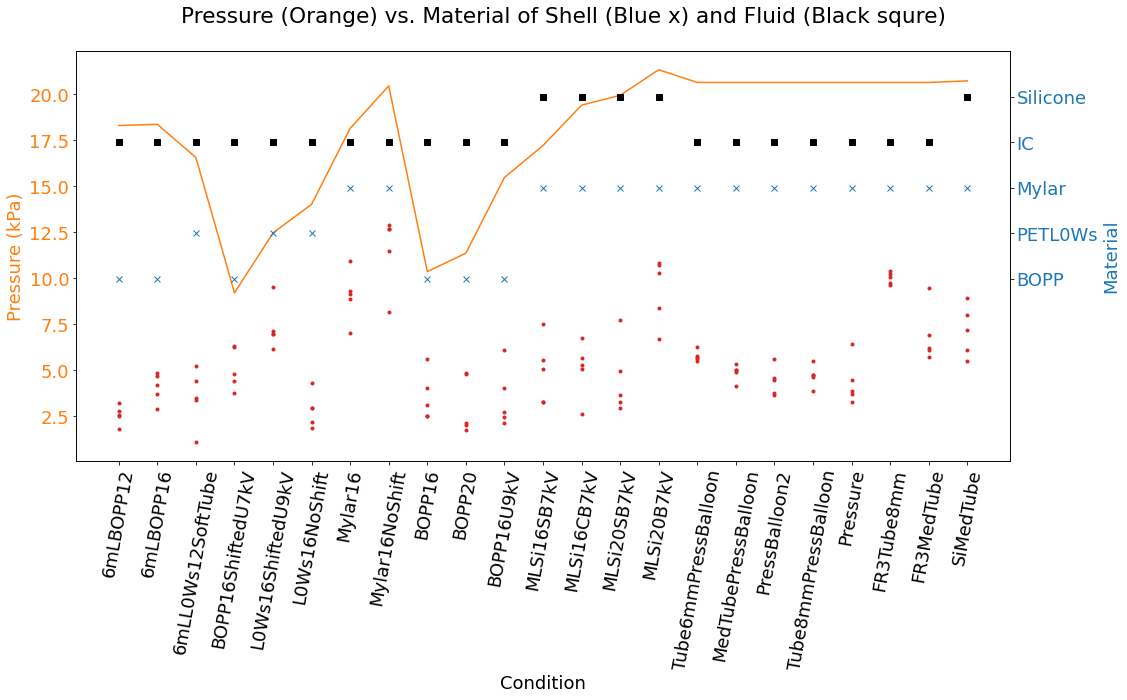

In [9]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,10)
fig1.suptitle("Pressure (Orange) vs. Material of Shell (Blue x) and Fluid (Black squre)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], simData['PFull_Pa']*1e-3, color='tab:orange')
ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax2 = ax1.twinx() 
ax2.plot(condiTable['CondiName'], condiTable['Shell'], 'x',color='tab:blue')
ax2.plot(condiTable['CondiName'], condiTable['Fluid'], 's',color='k')
ax2.set_ylabel('Material', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig1.tight_layout() 

ax2.set_ylim([-4, 5]);

In [10]:
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(10,6)
# fig1.suptitle("Pressure (Orange) vs. Layout (Blue)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['Layout'], 'x',color='tab:blue')
# ax2.set_ylabel('Layout', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([-6, 6]);

In [11]:
# fig1, ax1 = plt.subplots()
# fig1.set_size_inches(10,6)
# fig1.suptitle("Pressure (Orange) vs. Row Space (Blue x) and Dash length (Black square)")
# ax1.set_xlabel('Condition')
# ax1.set_xticklabels(simData['CondiName'], rotation=80)

# ax1.plot(simData['CondiName'], simData['PFull']*1e-3, color='tab:orange')
# ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
# ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax2 = ax1.twinx() 
# ax2.plot(condiTable['CondiName'], condiTable['DashSpace_mm'], 'x',color='tab:blue')
# ax2.plot(condiTable['CondiName'], condiTable['DashLength_mm'], 's',color='k')
# ax2.set_ylabel('(mm)', color='tab:blue')
# ax2.tick_params(axis='y', labelcolor='tab:blue')

# fig1.tight_layout() 

# ax2.set_ylim([0, 21]);